<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW3_Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df_copy = pd.read_csv('drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df.head()


NameError: ignored

In [ ]:
df.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
d

In [ ]:
#drop non-numerical data
drop=[]
for col in df:
  if df[col].dtypes==object:
    drop.append(col)
df = df.drop(drop,axis=1)

In [ ]:
#data summary
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
#number of missing values of each column
df.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
#drop samples which has >30% missing values
df=df.dropna(thresh=5)
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84
5039,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
5040,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
df.mean()

num_critic_for_reviews       1.401943e+02
duration                     1.072011e+02
director_facebook_likes      6.865092e+02
actor_3_facebook_likes       6.450098e+02
actor_1_facebook_likes       6.560047e+03
gross                        4.846841e+07
num_voted_users              8.366816e+04
cast_total_facebook_likes    9.699064e+03
facenumber_in_poster         1.371173e+00
num_user_for_reviews         2.727708e+02
budget                       3.975262e+07
title_year                   2.002471e+03
actor_2_facebook_likes       1.651754e+03
imdb_score                   6.442138e+00
aspect_ratio                 2.220403e+00
movie_facebook_likes         7.525965e+03
dtype: float64

In [ ]:
#fill missing values with mean
df=df.fillna(df.mean())
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.000000,178.000000,0.000000,855.000000,1000.0,7.605058e+08,886204,4834,0.0,3054.000000,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,302.000000,169.000000,563.000000,1000.000000,40000.0,3.094042e+08,471220,48350,0.0,1238.000000,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,602.000000,148.000000,0.000000,161.000000,11000.0,2.000742e+08,275868,11700,1.0,994.000000,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,813.000000,164.000000,22000.000000,23000.000000,27000.0,4.481306e+08,1144337,106759,0.0,2701.000000,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,140.194272,107.201074,131.000000,645.009761,131.0,4.846841e+07,8,143,0.0,272.770808,3.975262e+07,2002.470517,12.0,7.1,2.220403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.000000,2.000000,318.000000,637.0,4.846841e+07,629,2283,2.0,6.000000,3.975262e+07,2013.000000,470.0,7.7,2.220403,84
5039,43.000000,43.000000,686.509212,319.000000,841.0,4.846841e+07,73839,1753,1.0,359.000000,3.975262e+07,2002.470517,593.0,7.5,16.000000,32000
5040,13.000000,76.000000,0.000000,0.000000,0.0,4.846841e+07,38,0,0.0,3.000000,1.400000e+03,2013.000000,0.0,6.3,2.220403,16
5041,14.000000,100.000000,0.000000,489.000000,946.0,1.044300e+04,1255,2386,5.0,9.000000,3.975262e+07,2012.000000,719.0,6.3,2.350000,660


In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

NameError: ignored

In [ ]:
y = normalized_df['num_critic_for_reviews']


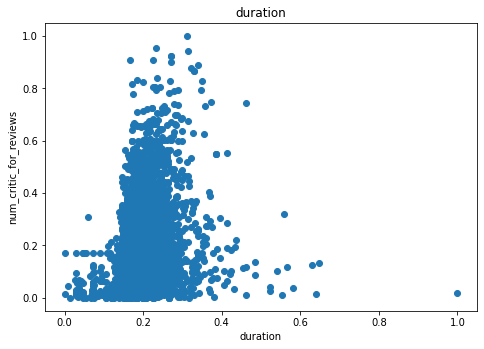

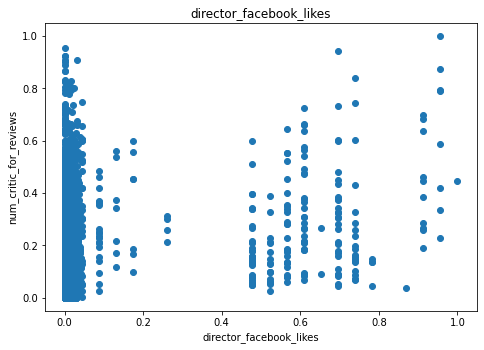

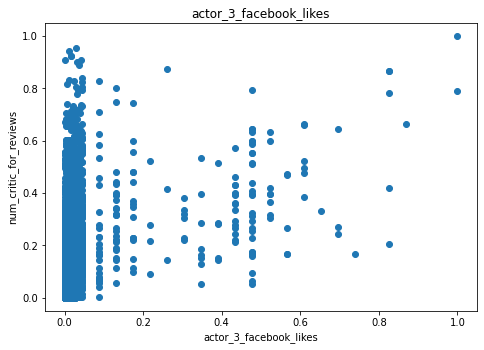

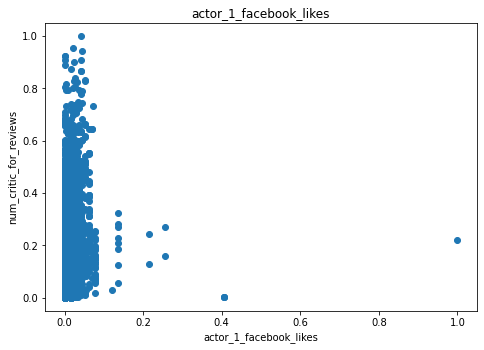

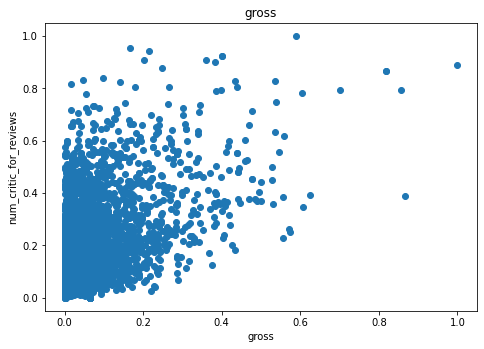

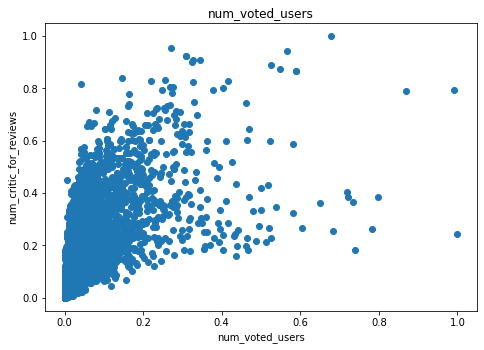

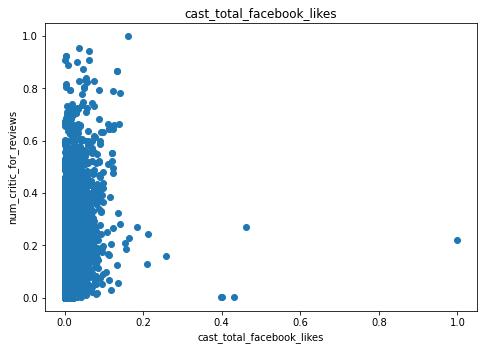

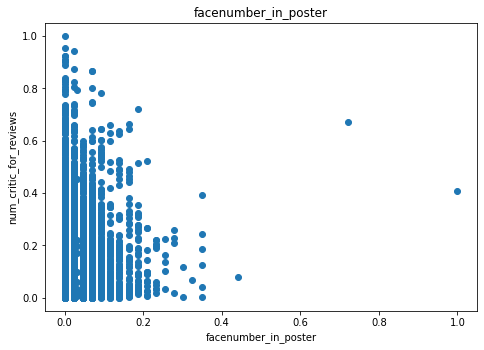

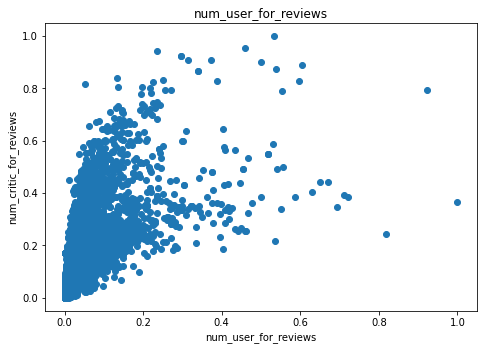

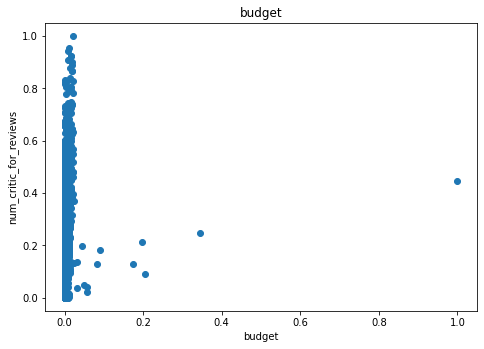

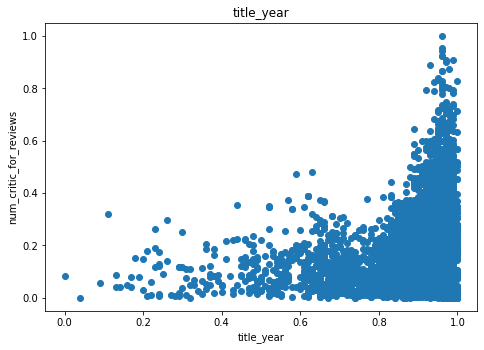

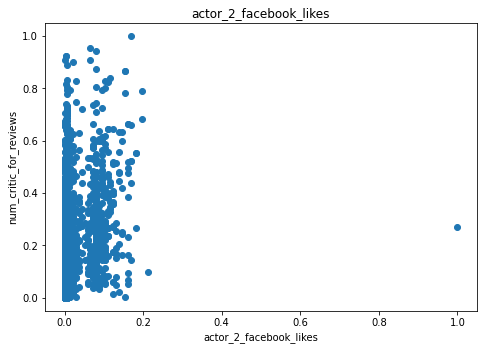

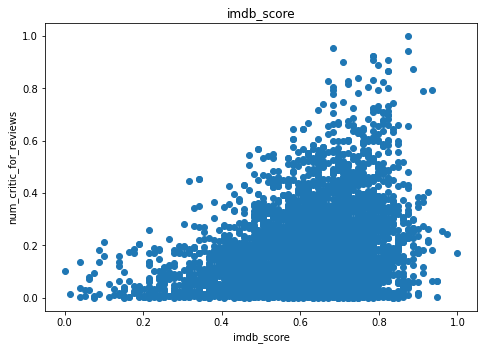

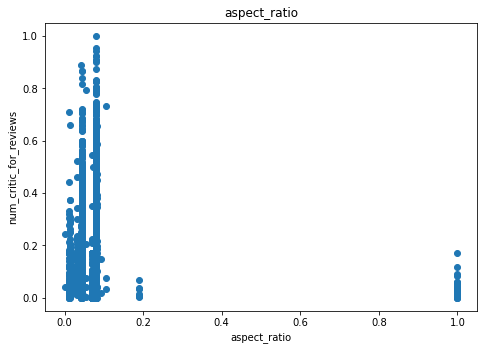

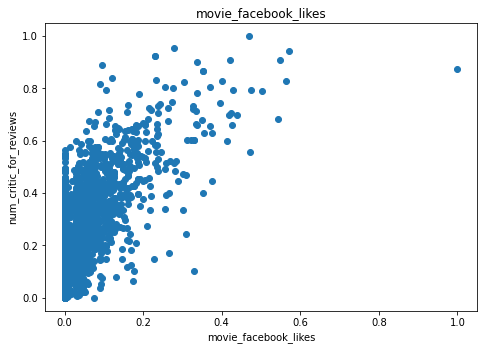

In [ ]:
for col in normalized_df:
  if col!='num_critic_for_reviews':
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(normalized_df[col],y)
    ax.set_xlabel(col)
    ax.set_ylabel('num_critic_for_reviews')
    ax.set_title(col)

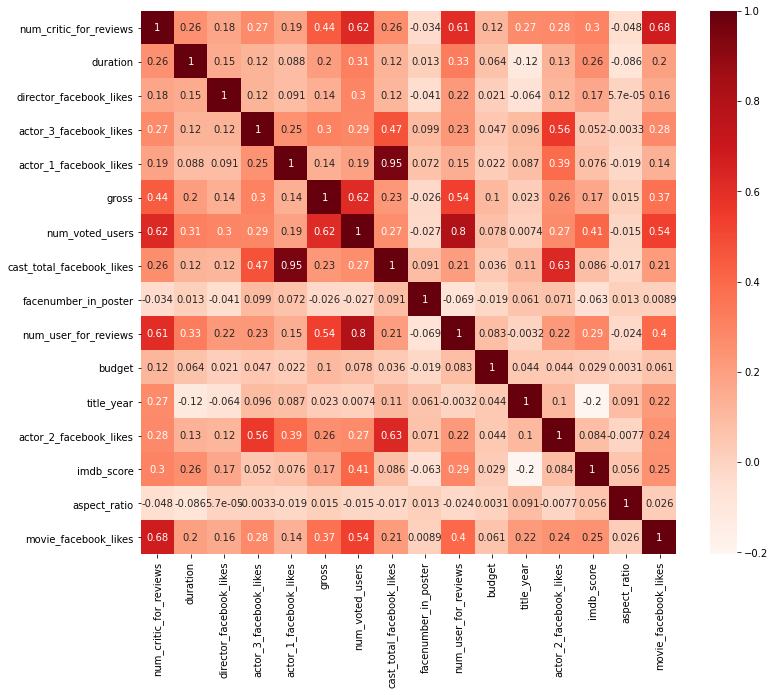

In [ ]:
plt.figure(figsize=(12,10))
corr = normalized_df.corr()
sb.heatmap(corr,annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(corr['num_critic_for_reviews'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

num_critic_for_reviews    1.000000
num_voted_users           0.623805
num_user_for_reviews      0.608509
movie_facebook_likes      0.682669
Name: num_critic_for_reviews, dtype: float64

In [ ]:
new_df = pd.DataFrame()
new_df = pd.concat([new_df,normalized_df['num_critic_for_reviews']],axis=1)
new_df = pd.concat([new_df,normalized_df['num_voted_users']],axis=1)
new_df = pd.concat([new_df,normalized_df['num_user_for_reviews']],axis=1)
new_df = pd.concat([new_df,normalized_df['movie_facebook_likes']],axis=1)
new_df

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
0,0.889163,0.524453,0.603479,0.094556
1,0.370690,0.278865,0.244515,0.000000
2,0.740148,0.163256,0.196284,0.243553
3,1.000000,0.677216,0.533702,0.469914
4,0.171422,0.000002,0.053720,0.000000
...,...,...,...,...
5038,0.000000,0.000369,0.000988,0.000241
5039,0.051724,0.043695,0.070765,0.091691
5040,0.014778,0.000020,0.000395,0.000046
5041,0.016010,0.000740,0.001581,0.001891


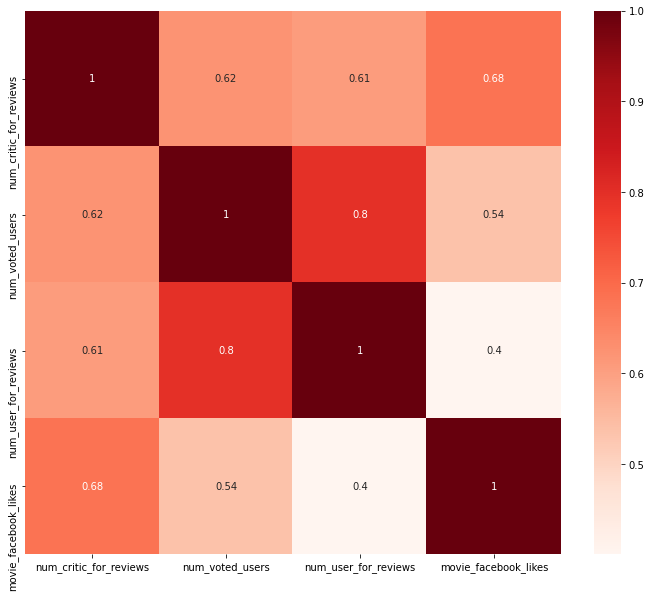

In [ ]:
plt.figure(figsize=(12,10))
corr = new_df.corr()
sb.heatmap(corr,annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#num_voted_users is highly correlated with other x's
#so we drop it
new_df = new_df.drop('num_voted_users',axis=1)
new_df

,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes
0,0.889163,0.603479,0.094556
1,0.370690,0.244515,0.000000
2,0.740148,0.196284,0.243553
3,1.000000,0.533702,0.469914
4,0.171422,0.053720,0.000000
...,...,...,...
5038,0.000000,0.000988,0.000241
5039,0.051724,0.070765,0.091691
5040,0.014778,0.000395,0.000046
5041,0.016010,0.001581,0.001891


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = new_df.drop('num_critic_for_reviews',axis=1)
y = new_df['num_critic_for_reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2_score(predictions,y_test)

0.4777255479163449

In [ ]:
mean_squared_error(y_test, predictions)

0.009773381450717352

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = new_df.drop('num_critic_for_reviews',axis=1)
y = new_df['num_critic_for_reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
kf = KFold(n_splits=5,shuffle=True) 

for train_index, test_index in kf.split(X_train):
      print("Train:", train_index.size, "Test:",test_index.size)
      X2_train, X2_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:] 
      y2_train, y2_test = y_train.iloc[train_index], y_train.iloc[test_index]
      model.fit(X2_train, y2_train)

predictions = model.predict(X_test)
print('R^2: '+str(r2_score(y_test,predictions)))
print('MSE: '+str(mean_squared_error(y_test, predictions)))


Train: 2824 Test: 706
Train: 2824 Test: 706
Train: 2824 Test: 706
Train: 2824 Test: 706
Train: 2824 Test: 706
R^2: 0.5631329494448285
MSE: 0.00978736270451613
